<h1><center>Goodreads Books</center></h1>

<img src=https://cdn2.mhpbooks.com/2013/09/goodreads.jpeg width="400" align= "center">

## 1. Introduction

Books are considered one of the most valuable things in life as they provide us with a great amount of knowledge and information. They help us in learning different aspects of life and also make us knowledgeable about various things. I started reading books since 10th grade, it helps me to handle with stress or distract from the world, so as a book lover I decided to give preference to the topic of books for the first analysis.

One of the world’s most influential reading websites "Goodreads" provides a well crafted platform for readers. The aim of the project is analyze the data according Goodreads by looking at over 11,000 books in several different languages by thousands of different authors and publishers. 

The dataset was retrieved from https://www.kaggle.com/jealousleopard/goodreadsbooks

## 2. Data description

The dataset contains following 12 columns:
* **bookID:** An unique identification number(ID) for each book
* **title:** The itles of the books
* **authors:** The names of the authors (Multiple authors are divided with '/')
* **average_rating:** The average ratings of the books
* **isbn:** An International Standard Book Number(ISBN) identifies the information about a book
* **isbn13:** The new format of ISBN (2007), 13 digits instead of the standard 11-digit ISBN.
* **language_code:** The languages of the books
* **num_pages:** The number of pages the book contains
* **ratings_count:** The number of ratings the book received
* **text_reviews_count:** The number of reviews the book received written by users
* **publication_date:** The publication dates of the book
* **publisher:** The publishers of the book

## 3. Research questions

1. Who were the most rated authors?
2. How the ratings of top 3 authors were changing over the years? 
3. Do number of pages make an impact on ratings or popularity? 
4. Which books would be mostly recommended to people? 
5. Are people tend to rate books writing review or just putting the "star" mark?
6. On which language the website should upload the books more? 
7. Does the reoccurance of a books through different publishers bias the rating?

## 4. Data preparation

In [1]:
#Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load and observe dataset
books = pd.read_csv("books.csv", error_bad_lines=False) 
#parameter error_bad_lines drops from the DataFrame rows with too many fields

books.head()

b'Skipping line 3350: expected 12 fields, saw 13\nSkipping line 4704: expected 12 fields, saw 13\nSkipping line 5879: expected 12 fields, saw 13\nSkipping line 8981: expected 12 fields, saw 13\n'


,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In [3]:
books.shape

(11123, 12)

There are data about 11123 books that were uploaded on Goodreads with different information such as authors, average rating, languages, publishers, publication date and others.

In [4]:
#Explore data types of each column
books.dtypes

bookID                  int64
title                  object
authors                object
average_rating        float64
isbn                   object
isbn13                  int64
language_code          object
  num_pages             int64
ratings_count           int64
text_reviews_count      int64
publication_date       object
publisher              object
dtype: object

In [5]:
#Checking if there are any missing values
books.isnull().sum()

bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
  num_pages           0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

As we can see, there are no missing values in dataset

In [6]:
#Let's change the name of column 'num_pages', because there is too many space
books = books.rename(columns={'  num_pages':'num_pages'})

In [7]:
#While exploring the dataset, I found that there are rows, which do not have books
no_book = books[books['authors'] == "NOT A BOOK"]
no_book['title'].count()

5

There are 5 rows without books

In [8]:
#Drop these rows, which don't contains books
books.drop(no_book.index, axis = 0, inplace = True)

In [9]:
#Drop unnecessary columns from dataset, they're not giving any significant meaning
books.drop(['isbn','isbn13'], axis=1, inplace = True)

In [10]:
#Let's check whether we have multiple entities for a single book. And if we have, we will delete those duplicates
print("Number of total books: {}".format(books['title'].count()))
print("Number of unique books: {}".format(books['title'].value_counts().count()),"\n")

#Delete duplicates
if books['title'].count() != books['title'].value_counts().count():
    books = books.drop_duplicates(subset='title', keep='first')

#Check the results
print("After deleting the duplicates:\n")
print("Number of total books: {}".format(books['title'].count()))
print("Number of unique books: {}".format(books['title'].value_counts().count()))

Number of total books: 11118
Number of unique books: 10343 

After deleting the duplicates:

Number of total books: 10343
Number of unique books: 10343


## 5. Data analysis and visualisation

### 5.1 Q1: Who were the most rated authors? 
Description of steps:
1. Using pandas, find the most popular authors by sorting values in descending order
2. Find the average ratigns of those authors
3. Plot the bar chart which demonstrates top 10 authors with highest average ratings

#### Data preparation for Q1

In [11]:
#Find the most popular authors
top_authors = books.groupby('authors')['title'].count().reset_index().sort_values('title',ascending=False).head(10).set_index('authors')

#Find the average ratings of those authors
average_rating_auth = ["Author Average Rating"]
authors = pd.DataFrame(0, index=np.arange(10),columns = average_rating_auth)
for i in books['authors']:
    if i in top_authors.index:
        for j in range(len(top_authors.index)):
            if i == top_authors.index[j]:
                authors.loc[j] += books['average_rating'].loc[j]

for i in range(10):
    authors.iloc[i] = authors.iloc[i]/(top_authors.iloc[i][0])

#### Visualisation code for Q1

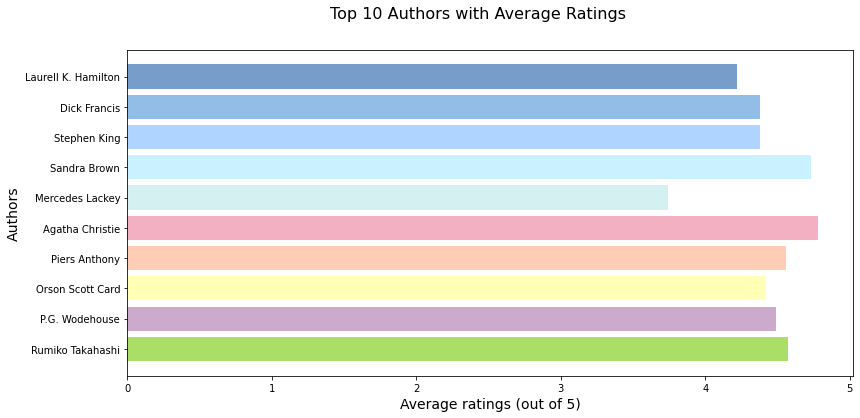

In [12]:
#Determine the colors for visualization
colors = ['#abde66','#cbaacb','#ffffb5','#ffccb6','#f3b0c3','#d4f0f0','#caf1ff','#aed4ff','#92bde7','#779ecb']

#Visualisation with horizontal bar plot using mathpotlib
fig, ax = plt.subplots(figsize = (13,6))
fig.suptitle('Top 10 Authors with Average Ratings', size = 16)
ax.barh(top_authors.index, authors['Author Average Rating'], color = colors)
ax.set_xlabel('Average ratings (out of 5)', size = 14)
ax.set_ylabel('Authors', size = 14)
plt.show()

#### Findings and comments
From above bar chart we see top 10 authors along average ratings. Following by Agatha Christie, Sandra Brown was the most rated author among them with 4.8 rate and Mercedes Lackey was the worst, he has rate less by 1, which is 3.8. Others ratings quite similar to each other, between 4.4 and 4.6.

### 5.2 Q2: How the ratings of top 3 authors were changing over the years? 
Description of steps:
1. Define the authors, assign them to variables
2. Extract years from date, and save them into new column
3. Assign year to the variable
3. Plot three lineplots with seaborn for analyzing each author into one figure

#### Data preparation for Q2

In [13]:
#Continuing from the previous task, for the obtained authors, find average ratings of top 3 over the years
ratings_agatha = books[books.authors == 'Agatha Christie']
ratings_sandra = books[books.authors == 'Sandra Brown']
ratings_takahashi = books[books.authors == 'Rumiko Takahashi']

#Extract years from date by saving them into a new column 'publication_year'
books['publication_year'] = books['publication_date'].str.split('/').apply(lambda x: x[2]).astype(int)
year = books['publication_year']

#### Visualisation code for Q2

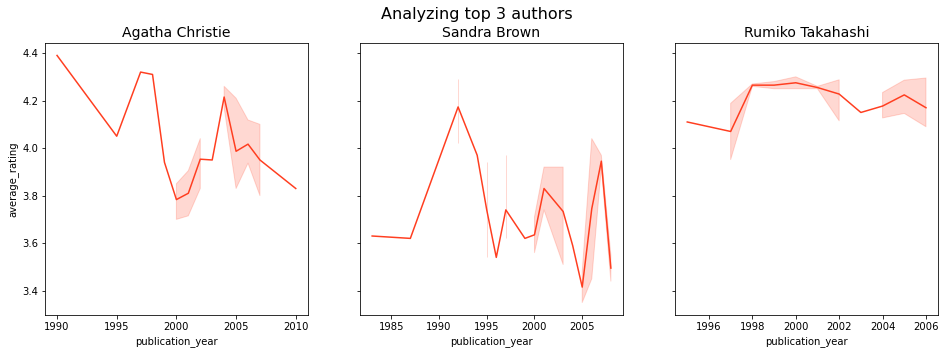

In [14]:
#Visualisation with lineplots using seaborn
fig, axes = plt.subplots(1, 3, figsize=(16, 5), sharey=True)
fig.suptitle('Analyzing top 3 authors', size = 16)

sns.lineplot(data = ratings_agatha, x = year, y = "average_rating", color='#ff3e20', ax = axes[0])
axes[0].set_title('Agatha Christie', size = 14)

sns.lineplot(data = ratings_sandra, x = year, y = "average_rating", color='#ff3e20', ax = axes[1])
axes[1].set_title('Sandra Brown', size = 14)

sns.lineplot(data = ratings_takahashi, x = year, y = "average_rating", color='#ff3e20', ax = axes[2])
axes[2].set_title('Rumiko Takahashi', size = 14)

plt.show()

#### Findings and comments
From above 3 plots, we can see that Sandra Brown was the most inconsistent writer over the time with the lowest rating about 3.4. While ratings for Takashaki's book was remaining high between 4.1 and 4.3. Agatha Christie's books ratings also remains high but only until 2005, and dropped sharply in 1997. 

### 5.3 Q3: Do number of pages make an impact on ratings or popularity of book?
Description of steps:
1. Using pandas sort the books according pages numbers
2. Find the average ratings of those books
3. Additional step, include only books with more than 1000 reviews
4. Plot two bar charts on one figure (Bar chart at the left side will show top books with highest number of pages and chart on the right side will show their average ratings)
5. Visualize second figure (line model plot) to show correspondence between number of pages and ratings

#### Data preparation for Q3

In [15]:
#Sorting the books based on their page numbers
top_page = books.sort_values('num_pages', ascending = False).head(10).set_index('title')

#Find the average ratings of the most pages books
average_ratings_pages = []
for i in top_page.index:
    average_ratings_pages.append(books.loc[books['title'] == i, 'average_rating'].iloc[0])

#I have taken books, which have more than 1000 reviews
reviews = books[books['ratings_count'] > 1000]

#### Visualisation code for Q3

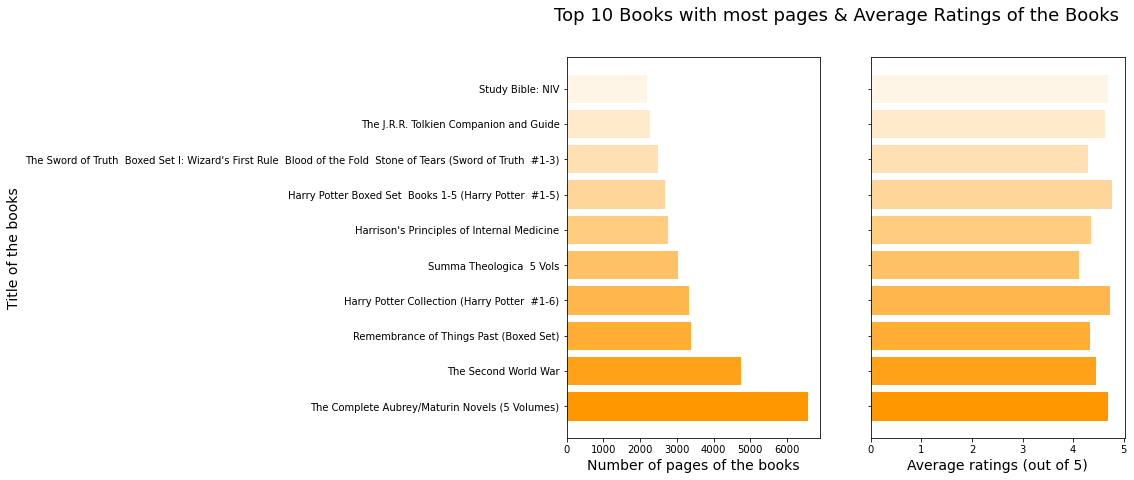

In [16]:
#Determine the colors for visualization
colors = ['#ff9800','#ffa219','#ffad33','#ffb74d','#ffc166','#ffcc80','#ffd699','#ffe0b3','#ffeacc','#fff5e6']

#Visualisation with horizontal bar plot using mathpotlib
fig,ax = plt.subplots(1, 2, sharey=True, figsize=(10,7))
fig.suptitle('Top 10 Books with most pages & Average Ratings of the Books', size = 18)

ax[0].barh(top_page.index, top_page['num_pages'],color = colors)
ax[0].set_xlabel('Number of pages of the books', size = 14)
ax[0].set_ylabel('Title of the books', size = 14)

ax[1].barh(top_page.index, average_ratings_pages, color = colors)
ax[1].set_xlabel('Average ratings (out of 5)', size = 14)

plt.show()

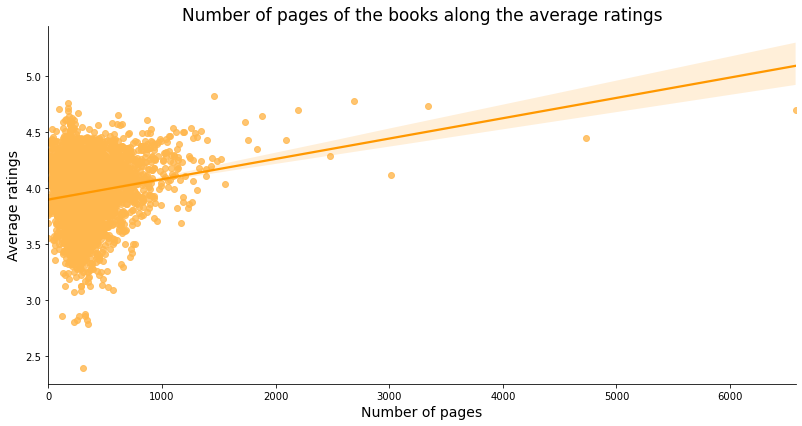

In [17]:
sns.lmplot(y = 'average_rating', x = 'num_pages', data = reviews,  scatter_kws = {"color": '#ffb74d'}, line_kws = {"color": '#ff9800'}, height=5.5, aspect=2)
plt.xlabel('Number of pages', size = 14)
plt.ylabel('Average ratings', size = 14)
plt.title('Number of pages of the books along the average ratings', size = 17)
plt.show()

#### Findings and comments
According to the bar graph, there is no significant correlation between number of pages and given review. Nevertheless, the linear model plot shows that there are only a few ratings for book titles with over 2000 pages, which indicates that readers prefer shorter literature. Within the range up to 1500 pages, there is a huge spread in terms of average rating showing minor correlation between both variables. 

### 5.4 Q4: Which books would be mostly recommended to people? 
Description of steps:
1. Assign the column 'average_rating' to variable
2. Find top books with highest average ratings
3. Plot distribution plot with seaborn to show the general idea about average ratings of books
4. Visualize the final answer with bar graph, which shows top books according to average ratings

#### Data preparation for Q4

In [18]:
#Taking average rating column for further work
average_ratings = books['average_rating']

#Sort books based on average ratings
top_books_rate = books[books['ratings_count'] > 1000].sort_values('average_rating',ascending=False).reset_index().head(10).set_index('title')

#### Visualisation code for Q4

/Users/mereyorazaly/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


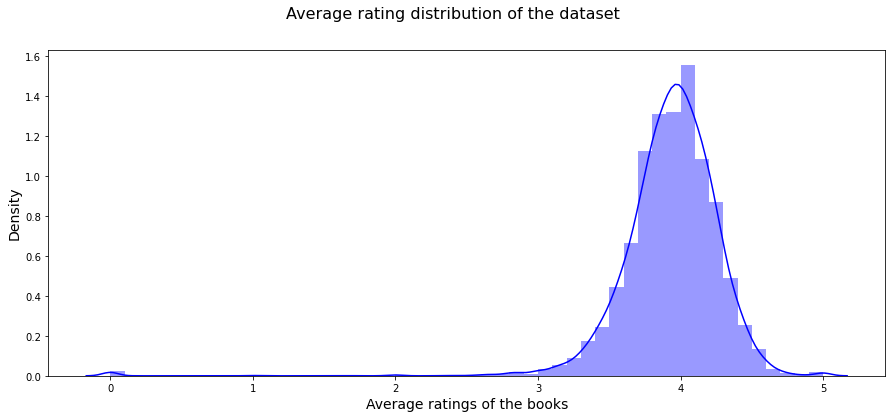

In [19]:
#Visualisation with distplot using seaborn
fig, ax = plt.subplots(figsize=(15,6))
fig.suptitle('Average rating distribution of the dataset', size = 16)
sns.distplot(average_ratings, ax = ax, color='b')
ax.set_xlabel('Average ratings of the books', size = 14)
ax.set_ylabel('Density', size = 14)
plt.show()

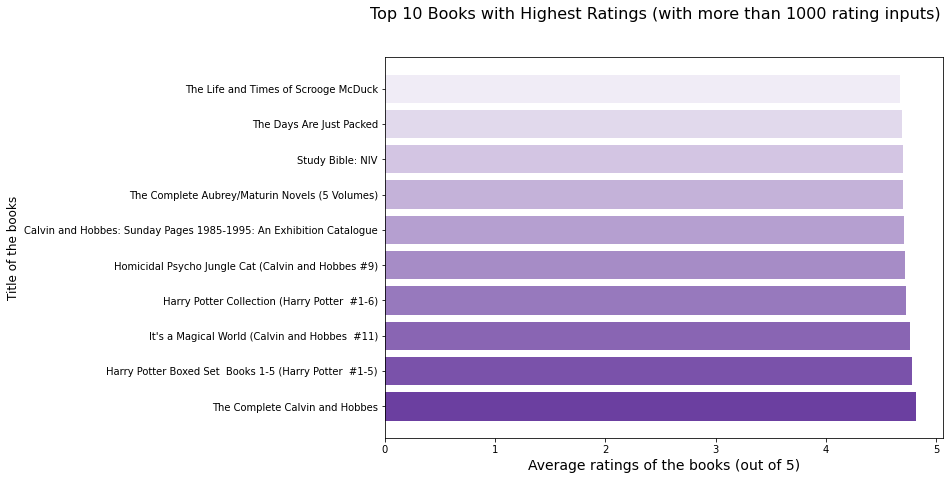

In [20]:
#Determine the colors of the bar plots for visualization
colors = ['#6b3fa0','#7a52aa','#8965b3','#9779bd', '#a68cc6','#b59fd0','#c4b2d9','#d3c5e3','#e1d9ec','#f0ecf6']

#Visualisation with horizontal bar plot using mathpotlib
fig, ax = plt.subplots(figsize=(10,7))
fig.suptitle('Top 10 Books with Highest Ratings (with more than 1000 rating inputs)', size = 16)
ax.barh(top_books_rate.index, top_books_rate['average_rating'], color = colors)
ax.set_xlabel('Average ratings of the books (out of 5)', size = 14)
ax.set_ylabel('Title of the books', size = 12)
plt.show()

#### Findings and comments
From 1st plot, we can see that the majority of books have a rating between 3.5 and 4.5 and most books being rated with 4 stars. The number of scores of 0 or 5 ratings are not significant. Looking at the 2nd plot, I found that 6 out of 10 best rated books on "Goodreads" are either Harry Potter or Calvin and Hobbes books. The highest score achieved was around 4.85 with over 1000 reviews.

### 5.5 Q5: Are people tend to rate books writing review or just putting the "star" mark?
Description of steps:
1. Assign the columns 'ratings_count' and 'text_reviews_count' to variables
2. Plot the scatter plot with mathpotlib to show the correlation between number of text ratings and numerical ratings

#### Data preparation for Q5

In [21]:
#Assigning the columns to certain variables
numerical_ratings = books['ratings_count']
text_ratings = books['text_reviews_count']

#### Visualisation code for Q5

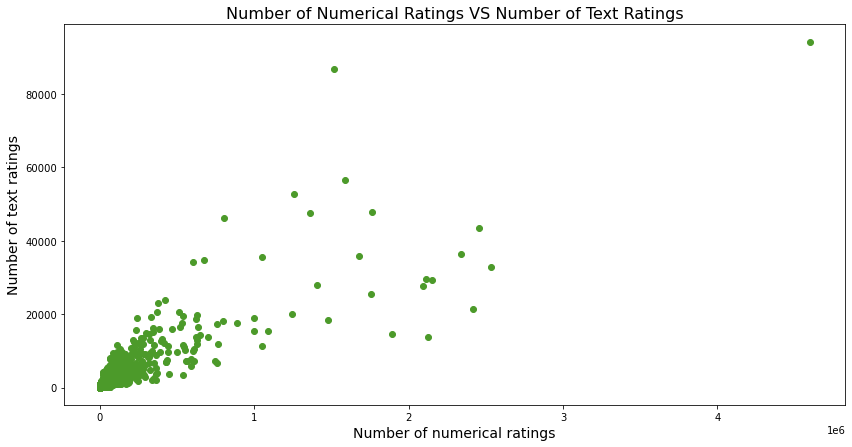

In [22]:
#Visualisation with scatter plot using mathpotlib
fig, ax = plt.subplots(figsize=(14,7))
plt.scatter(x = numerical_ratings, y = text_ratings, color = '#4c9a2a')
ax.set_title('Number of Numerical Ratings VS Number of Text Ratings', size = 16)
ax.set_xlabel('Number of numerical ratings', size = 14)
ax.set_ylabel('Number of text ratings', size = 14)
plt.show()

#### Findings and comments
From the plot we see that there is a positive correlation between numerical ratings and text ratings. It means that people put the "star" mark and write review at the same time. Not surprisingly, because readers prefer to express their thoughts, share emotions and feelings about the book, that's why we see this tendency to text reviews.

### 5.6 Q6: On which language the website should upload the books more?
Description of steps:
1. Clarify language codes
2. Plot the bar graph with mathpotlib to show the languages with number of books
3. Visualize top 5 languages using pie chart to illustrate percentage and difference clearly

#### Data preparation for Q6

In [23]:
#Clarify language codes 
books.language_code.replace(to_replace=['eng', 'en-US', 'fre', 'spa', 'en-GB', 'mul', 'grc', 'enm',
       'en-CA', 'ger', 'jpn', 'ara', 'nl', 'zho', 'lat', 'por', 'srp', 'ita', 
        'rus', 'msa','glg', 'wel', 'swe', 'nor', 'tur', 'gla', 'ale'],
        value=['English','US-English','French','Spanish','British-English','Multiple language','Greek',
        'Middle English','Canada-English', 'German','Japanese','Arabic','Dutch', 'Chinese',
        'Latvian','Portuguese','Serbian','Initial teaching language', 'Russian',
        'Modern Standard Arabic','Galician','Welsh','Swedish','Murik','Turkish',
        'Gaelic','Afro-Asiatic'], inplace=True)

books = books.rename(columns={'language_code':'language'})

#Top languages by the number of books
top_languages = books.groupby('language')['title'].count()

#Top 5 languages
five_most_language = books.groupby('language')['title'].count().reset_index().sort_values('title',ascending=False).head(5).set_index('language')

#### Visualisation code for Q6

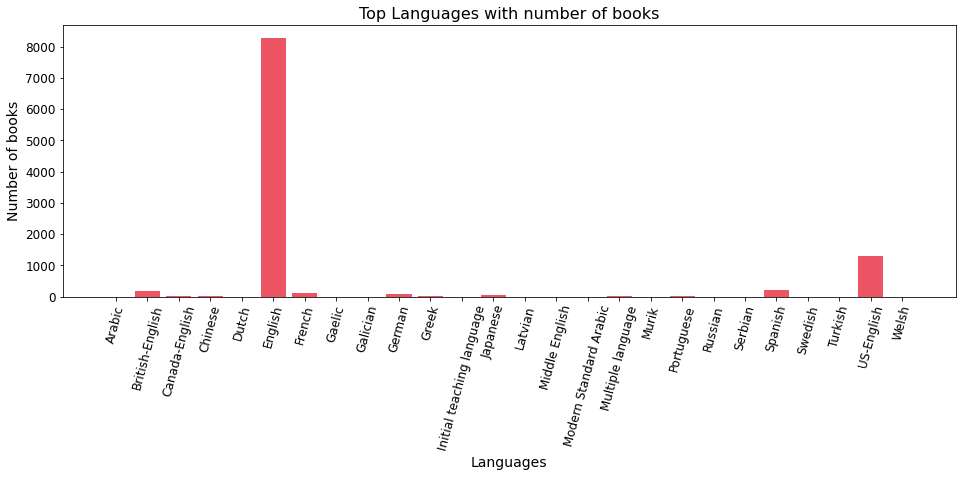

In [24]:
#Visualisation with bar plot using mathpotlib
plt.figure(figsize = (16,5))
plt.bar(top_languages.index, top_languages, color = '#ed5564')
plt.xlabel('Languages', size = 14)
plt.ylabel('Number of books', size = 14)
plt.xticks(rotation = 75, size=12)
plt.yticks(size=12)
plt.title('Top Languages with number of books', size = 16)
plt.show()

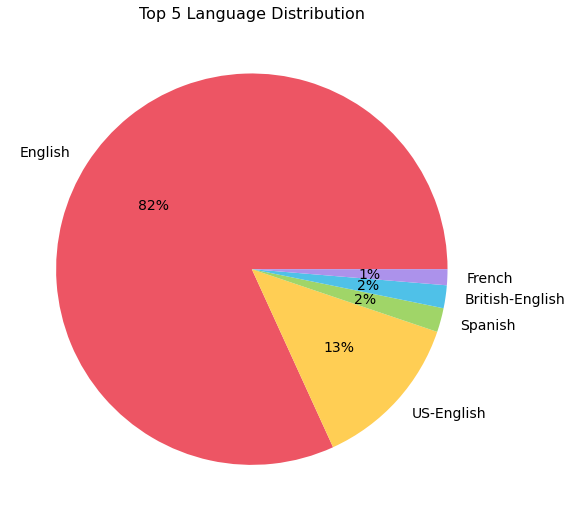

In [25]:
#Determine the colors for visualization
colors = ['#ed5564', '#ffce54','#a0d568','#4fc1e8','#ac92eb'] 

#Visualisation with pie chart using mathpotlib
fig, ax = plt.subplots(figsize=(16,9))
ax.pie(five_most_language['title'], labels = five_most_language.index, colors = colors, autopct = '%1.0f%%', textprops={'fontsize': 14})
ax.set_title('Top 5 Language Distribution', size = 16)
plt.show()

#### Findings and comments
There is no doubt that English is the international language. Therefore, from this plots, we can understand that most of the books was originally published in English. Pie chart shows that there is 82% of books in English. Answering the questions, "Goodreads" website should upload more books on other languages. 

### 5.7 Q7: Does the reoccurance of a book through different publishers bias the rating?
Description of steps:
1. Sort publishers according to the number of published books
2. Find the average ratings of those publishers
3. Plot bar chart and box plot in one figure, bar chart demonstrates the publishers along with number of published books, while box plot shows average ratings of the publishers

#### Data preparation for Q7

In [26]:
#Sort publishers along the largest number of published books
most_publish = books.groupby('publisher')['title'].count().reset_index().sort_values('title',ascending=False).head(10).set_index('publisher')

#Find the average ratings of those publishers
average_ratings_pbls = ['Publisher Average Rating']
publishers = pd.DataFrame(0, index=np.arange(10),columns = average_ratings_pbls)
for i in books['publisher']:
    if i in most_publish.index:
        for j in range(len(most_publish.index)):
            if i == most_publish.index[j]:
                publishers.loc[j] += books['average_rating'].loc[j]

for i in range(10):
    publishers.iloc[i] = publishers.iloc[i]/(most_publish.iloc[i][0])

#Sort the top 10 publishers
top_ten_publishers = list(books.groupby('publisher').count()['title'].reset_index().sort_values(by='title', ascending=False).head(10).publisher)

#### Visualisation code for Q7

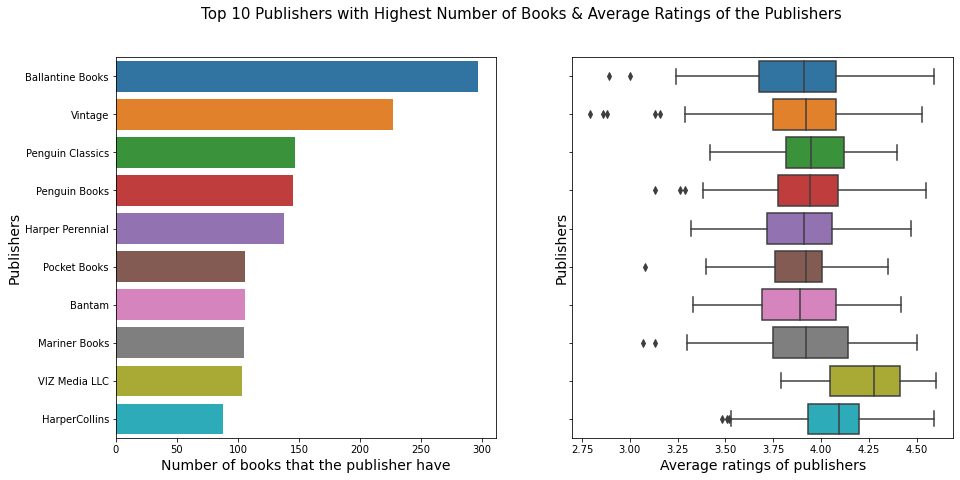

In [27]:
#Visualisation with horizontal bar plot and box plot using seaborn
fig, axes = plt.subplots(1, 2, sharey = True, figsize = (15,7))
fig.suptitle('Top 10 Publishers with Highest Number of Books & Average Ratings of the Publishers', size = 15)

ax = sns.barplot(y = most_publish.index, x = most_publish['title'], ax = axes[0])
ax.set_xlabel('Number of books that the publisher have', size = 14)
ax.set_ylabel('Publishers', size = 14)

ax = sns.boxplot(data = books[books.publisher.isin(top_ten_publishers)], x = 'average_rating', y = 'publisher', ax = axes[1])
ax.set_xlabel('Average ratings of publishers', size = 14)
ax.set_ylabel('Publishers', size = 14)

plt.show()

#### Findings and comments
As a results, we can say that even the publisher is popular by the value counts, it doesn't mean that it has higher average ranking. On boxplot we see that despite the fact that Balentine Books has a largest number of books published, it does not give to publisher a rating advantage. While VIZ Media LLC leads the average rating with 4.25 followed by Harper collins, which is around 4.15, but both of them have least amount of books, betweeen 80 and 100. The rest of the publishers doesn't have a significant median rating difference. 

## 6. Conclusion
In conclusion, analyzing book information not only to understand the user’s reading habit, I have learned a lot about why certain books have such a profound impact, and gathered information about authors, publishers. At the end, I have found all answers to the research questions. I got to know new popular authors and books for myself, identified a future impoves on website and understand some important features such as reviews of readers, impact of number of book's pages.  Hopefully, my findings would be helpful and useful to others.